In [44]:
import pandas as pd

df = pd.read_csv("D:\kaggle\Data Developer Salary in 2024\Dataset salary 2024.csv")
df.head()

<>:3: SyntaxWarning: invalid escape sequence '\k'
<>:3: SyntaxWarning: invalid escape sequence '\k'
C:\Users\acer\AppData\Local\Temp\ipykernel_9896\1633446204.py:3: SyntaxWarning: invalid escape sequence '\k'
  df = pd.read_csv("D:\kaggle\Data Developer Salary in 2024\Dataset salary 2024.csv")


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


Explore how many unique values in categorical data

In [45]:
df.nunique()

work_year                5
experience_level         4
employment_type          4
job_title              155
salary                2560
salary_currency         23
salary_in_usd         2939
employee_residence      88
remote_ratio             3
company_location        77
company_size             3
dtype: int64

Check each data types

In [46]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

**Remote Ratio Each Year**: 2020 & 2021 more WFH, 2022 balanced WFH and WFO, 2023 & 2024 more WFO

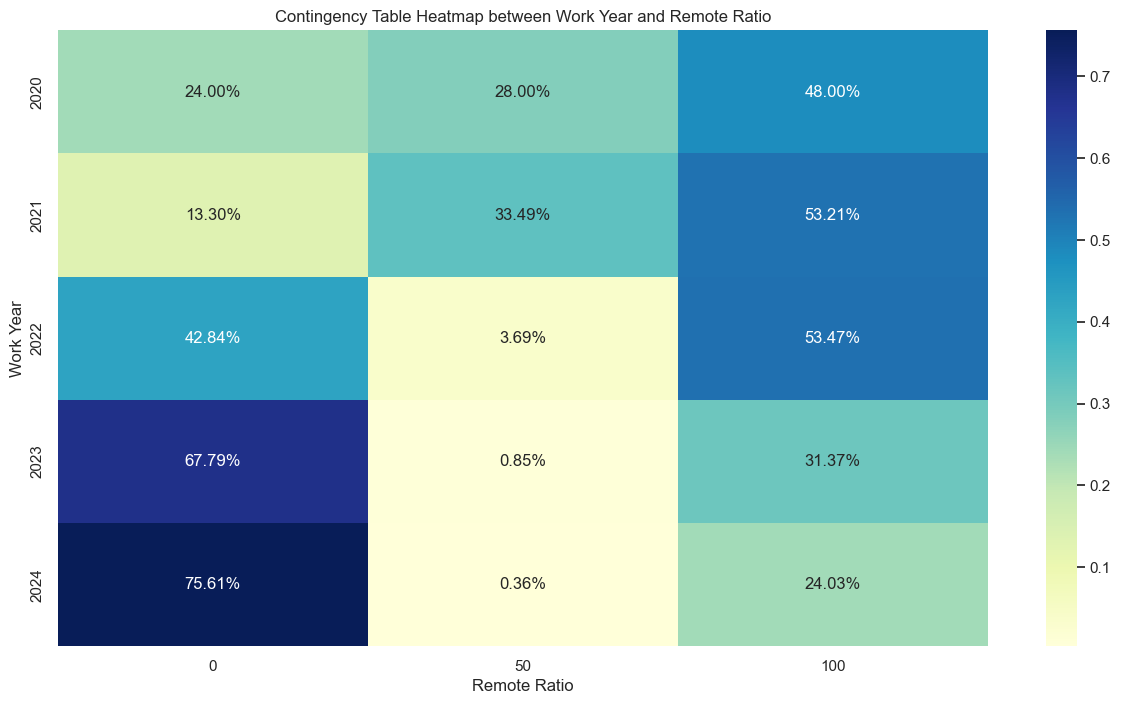

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

contingency_table1 = pd.crosstab(df['work_year'], df['remote_ratio'])

contingency_table_proportions = contingency_table1.div(contingency_table1.sum(axis=1), axis=0)

plt.figure(figsize=(15, 8))
sns.heatmap(contingency_table_proportions, annot=True, fmt='.2%', cmap='YlGnBu')
plt.title('Contingency Table Heatmap between Work Year and Remote Ratio')
plt.xlabel('Remote Ratio')
plt.ylabel('Work Year')
plt.show()

**Top 10 Job Title With The Highest Salary**

C:\Users\acer\AppData\Local\Temp\ipykernel_9896\1642422700.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='salary_in_usd', y='job_title', data=top_10_jobs, palette='viridis')


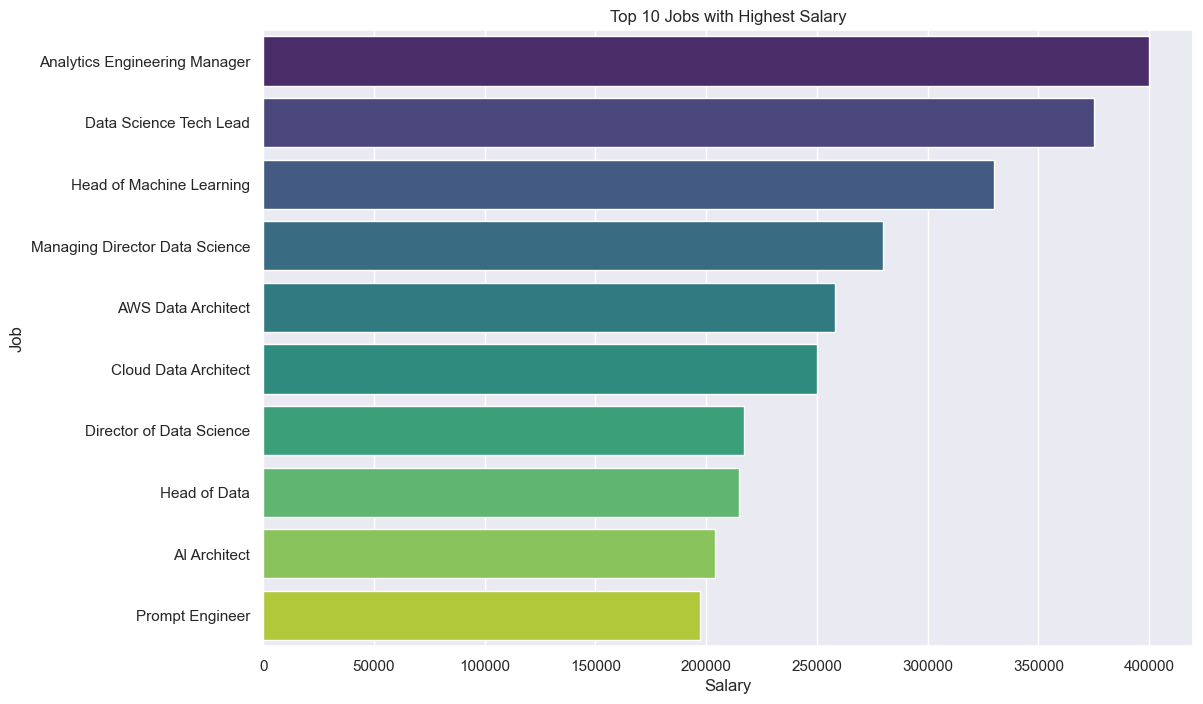

In [54]:
median_salaries = df.groupby('job_title')['salary_in_usd'].median().reset_index()

top_10_jobs = median_salaries.sort_values(by='salary_in_usd', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='salary_in_usd', y='job_title', data=top_10_jobs, palette='viridis')
plt.title('Top 10 Jobs with Highest Salary')
plt.xlabel('Salary')
plt.ylabel('Job')
plt.show()

Encode categorical column with label encoder (0,1,...)

In [4]:
from sklearn.preprocessing import LabelEncoder

df_test = df[["work_year","experience_level","employment_type","job_title","salary_in_usd","employee_residence","remote_ratio","company_location","company_size"]]

label_encoder = LabelEncoder()
columns_to_encode = ['experience_level','employment_type','job_title','employee_residence','company_location','company_size']

for column in columns_to_encode:
    df_test[column] = label_encoder.fit_transform(df_test[column])


C:\Users\acer\AppData\Local\Temp\ipykernel_9896\2542717789.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[column] = label_encoder.fit_transform(df_test[column])
C:\Users\acer\AppData\Local\Temp\ipykernel_9896\2542717789.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[column] = label_encoder.fit_transform(df_test[column])
C:\Users\acer\AppData\Local\Temp\ipykernel_9896\2542717789.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

Correlation between each feature with salary in usd. The results don't say much because the correlation of all features are low. But **experience level**, **employee residence**, **company location**, and **job title** have a significant correlation compared to the other features.

C:\Users\acer\AppData\Local\Temp\ipykernel_9896\839341710.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correlation', y='Band', data=correlation_df, palette='viridis')


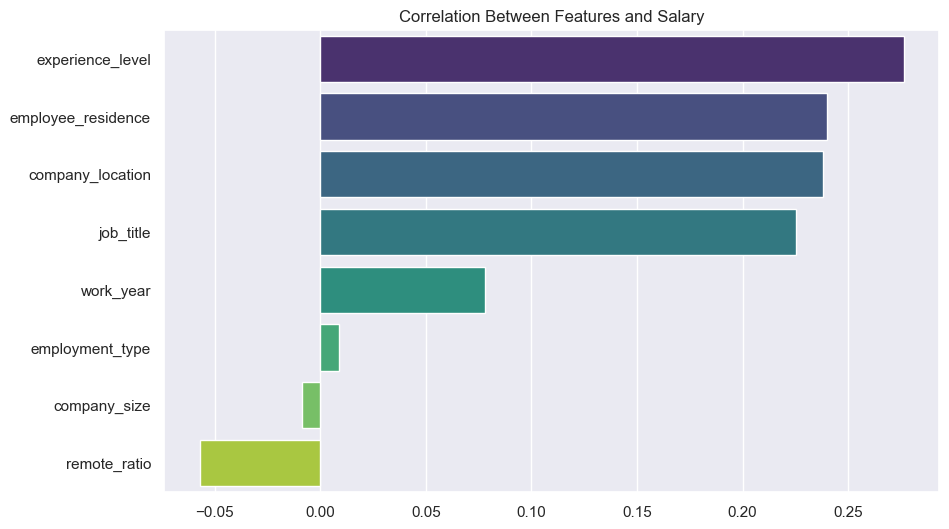

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

features = ["work_year","experience_level","employment_type","job_title","employee_residence","remote_ratio","company_location","company_size"]
label = 'salary_in_usd'

correlation_coefficients = {feature: stats.pointbiserialr(df_test[feature], df_test[label])[0] for feature in features}

correlation_df = pd.DataFrame(list(correlation_coefficients.items()), columns=['Band', 'Correlation'])

correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)

sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation', y='Band', data=correlation_df, palette='viridis')
plt.title("Correlation Between Features and Salary")
plt.xlabel("")
plt.ylabel('')
plt.show()

For better understanding, use heatmap to visualize correlation between each feature. The results are not really meaningful, but turns out employees tend to work in the same location with company location (*based on strong positive correlation between employee residence and company location*).

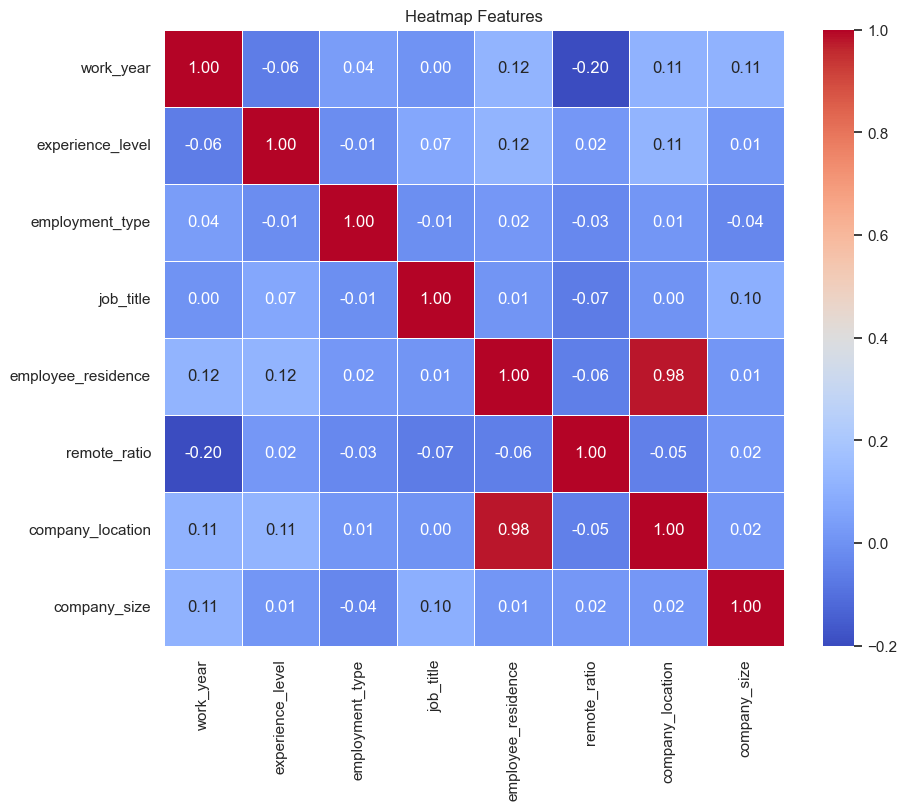

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_test[["work_year","experience_level","employment_type","job_title","employee_residence","remote_ratio","company_location","company_size"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Features')
plt.show()

In [7]:
columns = ["work_year","experience_level","employment_type","job_title","employee_residence","remote_ratio","company_location","company_size"]

X = df_test[columns]
y = df_test['salary_in_usd']

**Choose Best Linkage Method**: Using Dendrogram. Which dendrogra. Which dendrogram each data is well-clustered. You can do this by looking at the distance from the division of the dendrogram, if there is a significant distance, it means that the results are well-clustered.

**Ward**: Shows distinct and well-separated clusters. The vertical distances between merges (height of the lines) are relatively high, indicating that clusters are merged only when they are quite close together.

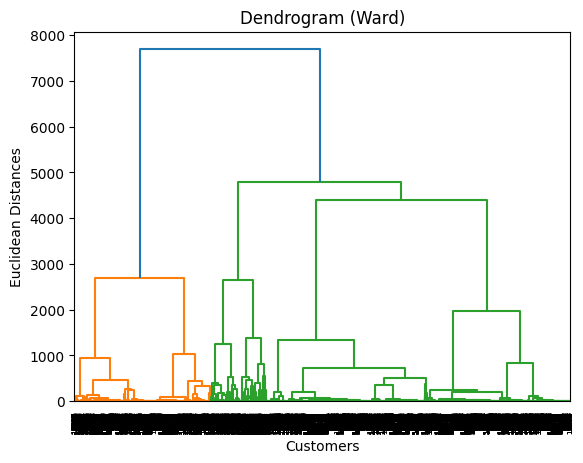

In [10]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

dendrogram = sch.dendrogram(sch.linkage(X, method="ward"))
plt.title("Dendrogram (Ward)")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distances")
plt.show()

**Complete**: Generally results in more balanced and spherical clusters. The clusters in the dendrogram are clear, but there might be some chaining effect where some points form elongated clusters.

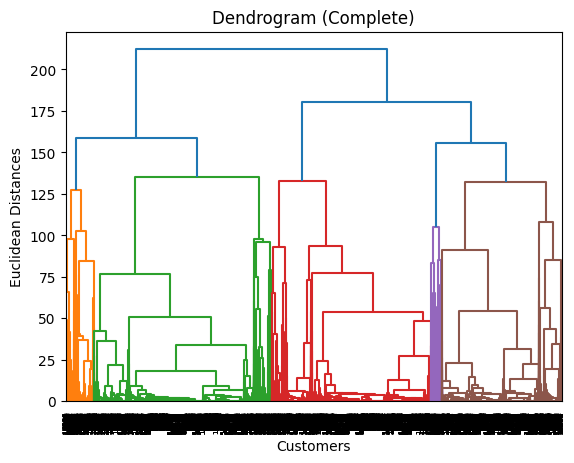

In [11]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

dendrogram = sch.dendrogram(sch.linkage(X, method="complete"))
plt.title("Dendrogram (Complete)")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distances")
plt.show()

**Average**: Shows moderate separation between clusters. It tends to balance between single and complete linkage, providing more evenly sized clusters than single linkage but less compact than complete linkage.

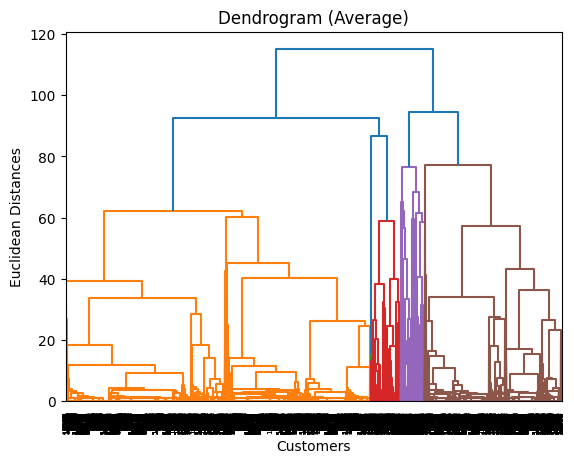

In [8]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

dendrogram = sch.dendrogram(sch.linkage(X, method="average"))
plt.title("Dendrogram (Average)")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distances")
plt.show()

**Single**: Often results in elongated clusters due to the chaining effect, where clusters may continue to grow by adding the nearest points, leading to less distinct separation between clusters.

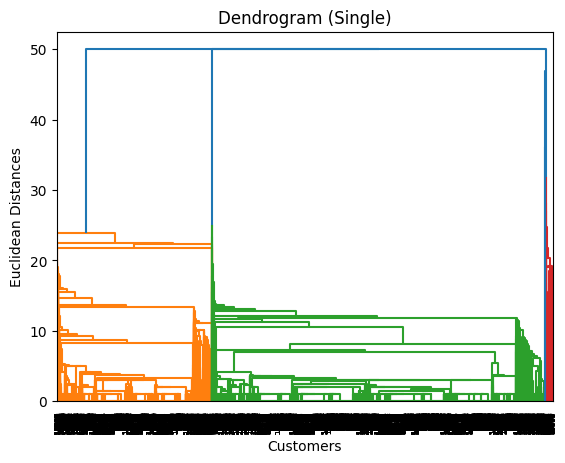

In [9]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

dendrogram = sch.dendrogram(sch.linkage(X, method="single"))
plt.title("Dendrogram (Single)")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distances")
plt.show()

**Ward Linkage** method seems to be the best choice based on the clarity and separation of clusters in the dendrogram. It minimizes the variance within clusters, leading to more compact and well-defined clusters. If your goal is to achieve distinct and interpretable clusters, Ward linkage would be the recommended method.

**CONCLUSION**: Ward Linkage with 4 cluster

In [9]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

ac = AgglomerativeClustering(n_clusters=4, metric="euclidean", linkage="ward")
ac.fit(X)
df["cluster"] = ac.labels_
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,cluster
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M,3
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M,3
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M,3
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M,3
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M,1


**Median Salary Each Cluster**
1. Cluster 1: **$166.000**
2. Cluster 0: **$145.360**
3. Cluster 3: **$133.000**
4. Cluster 2: **$83.864**

In [43]:
avg_salaries = df.groupby('cluster')['salary_in_usd'].median()
print("Median Salary Each Cluster",avg_salaries.tolist())

Median Salary Each Cluster [145360.0, 166000.0, 83864.0, 133000.0]


The nature of each cluster (most unique value proportion each cluster):
| Cluster | Work Year | Experience Level | Employment Type | Remote Ratio | Company Size | Job Title          | Employee Residence | Company Location | Median Salary  |
|---------|-----------|------------------|-----------------|--------------|--------------|--------------------|--------------------|------------------|----------------|
| 0       | 2022      | Senior Level     | Contract        | Remote       | Small        | Data Architect     | Netherlands        | Netherlands      | **$145,360**   |
| 1       | 2024      | Senior Level     | Full Time       | Onsite       | Medium       | Research Engineer  | United States      | United States    | **$166,000**   |
| 2       | 2020      | Entry Level      | Freelance       | Hybrid       | Large        | Other              | United Kingdom     | United Kingdom   | **$83,864**    |
| 3       | 2024      | Entry Level      | Full Time       | Onsite       | Small        | Applied Scientist  | United States      | United States    | **$133,000**   |

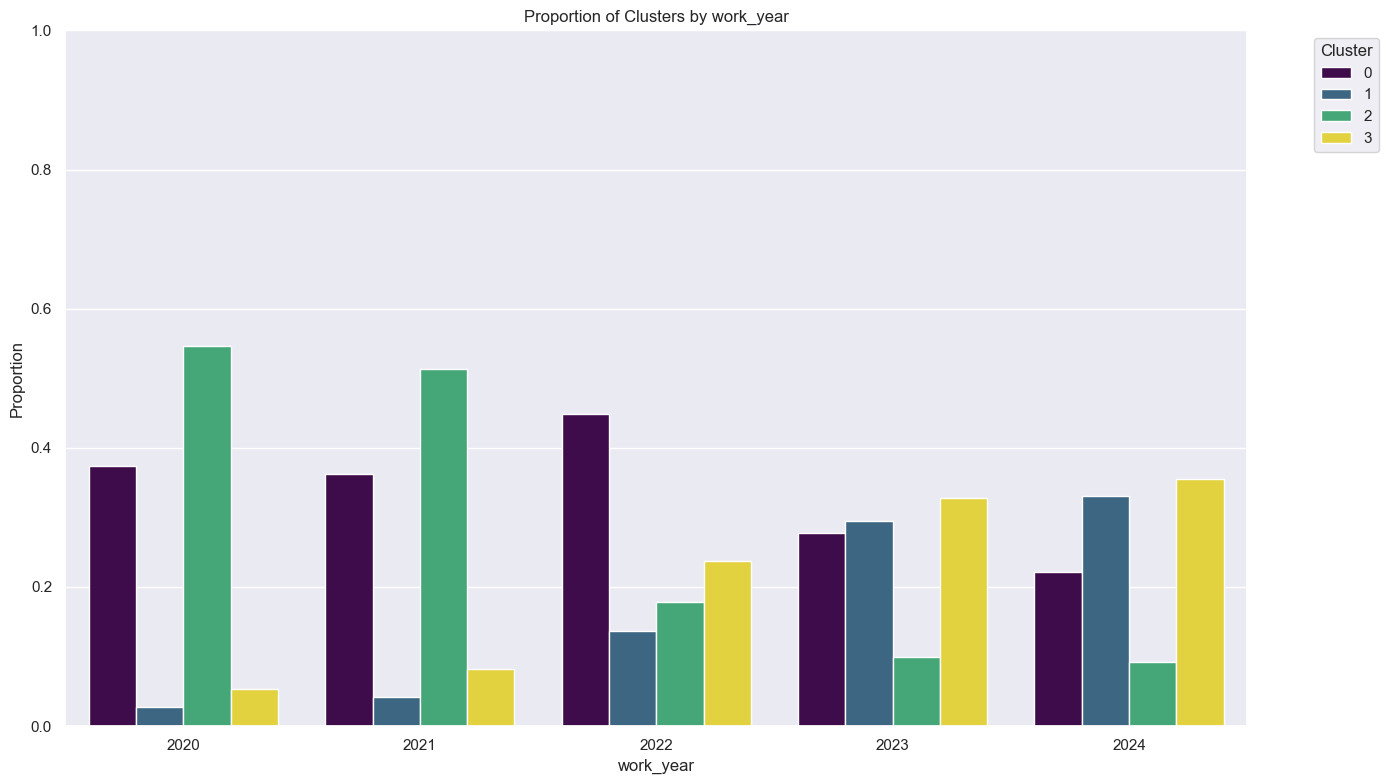

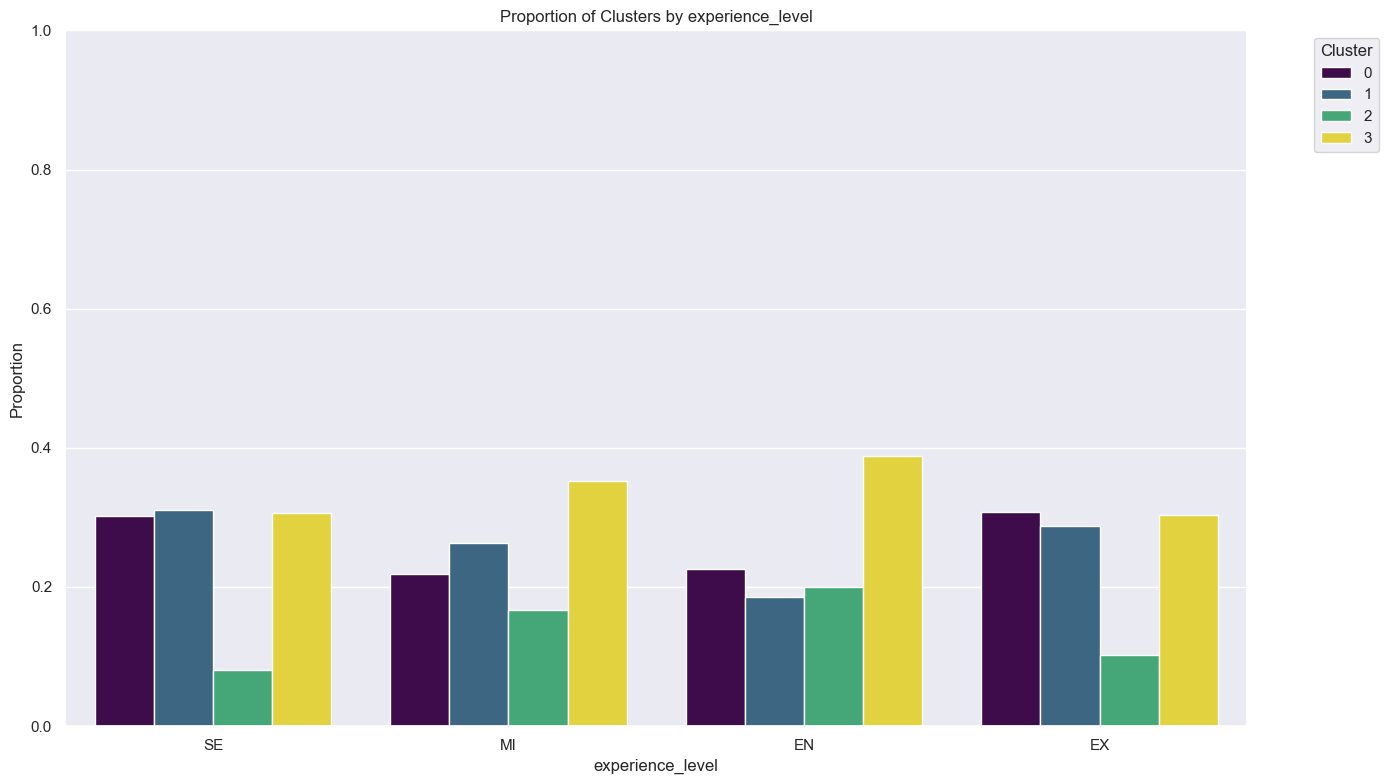

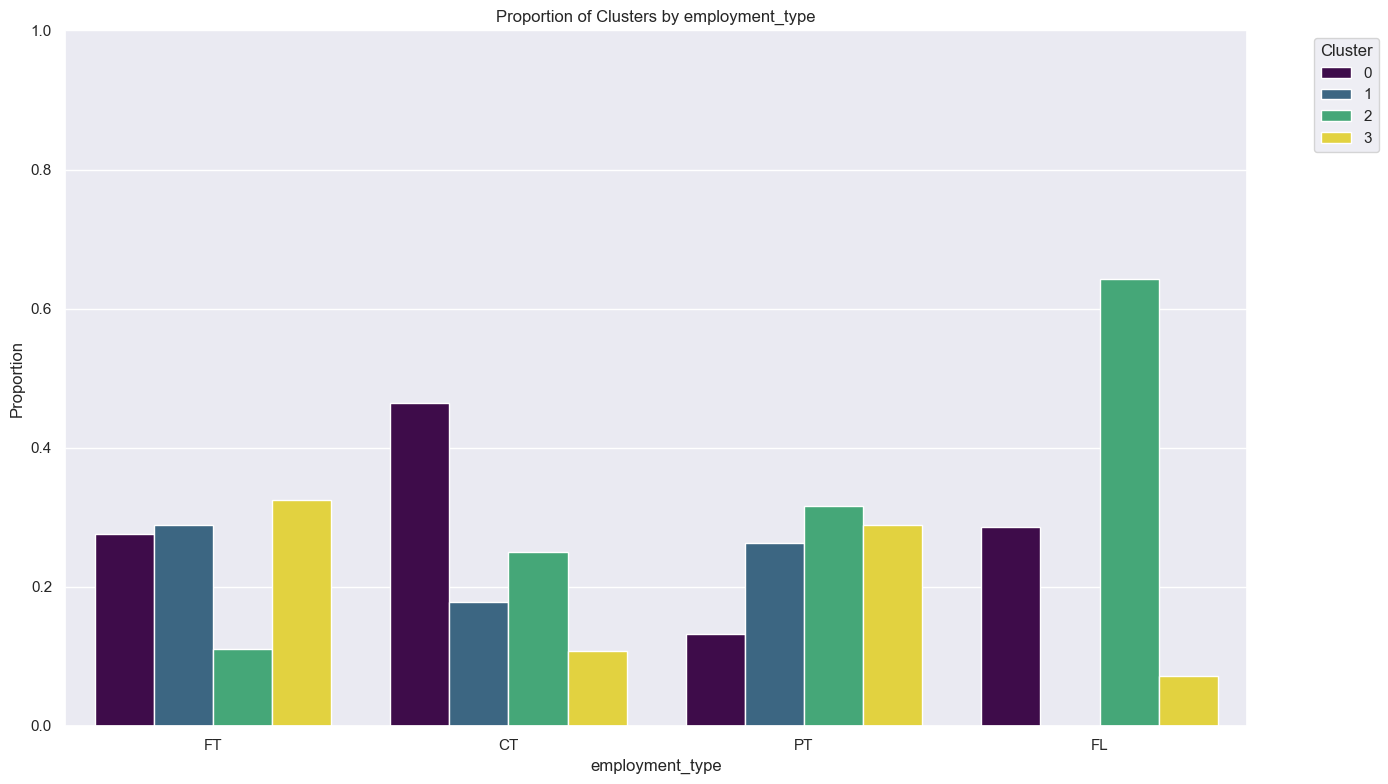

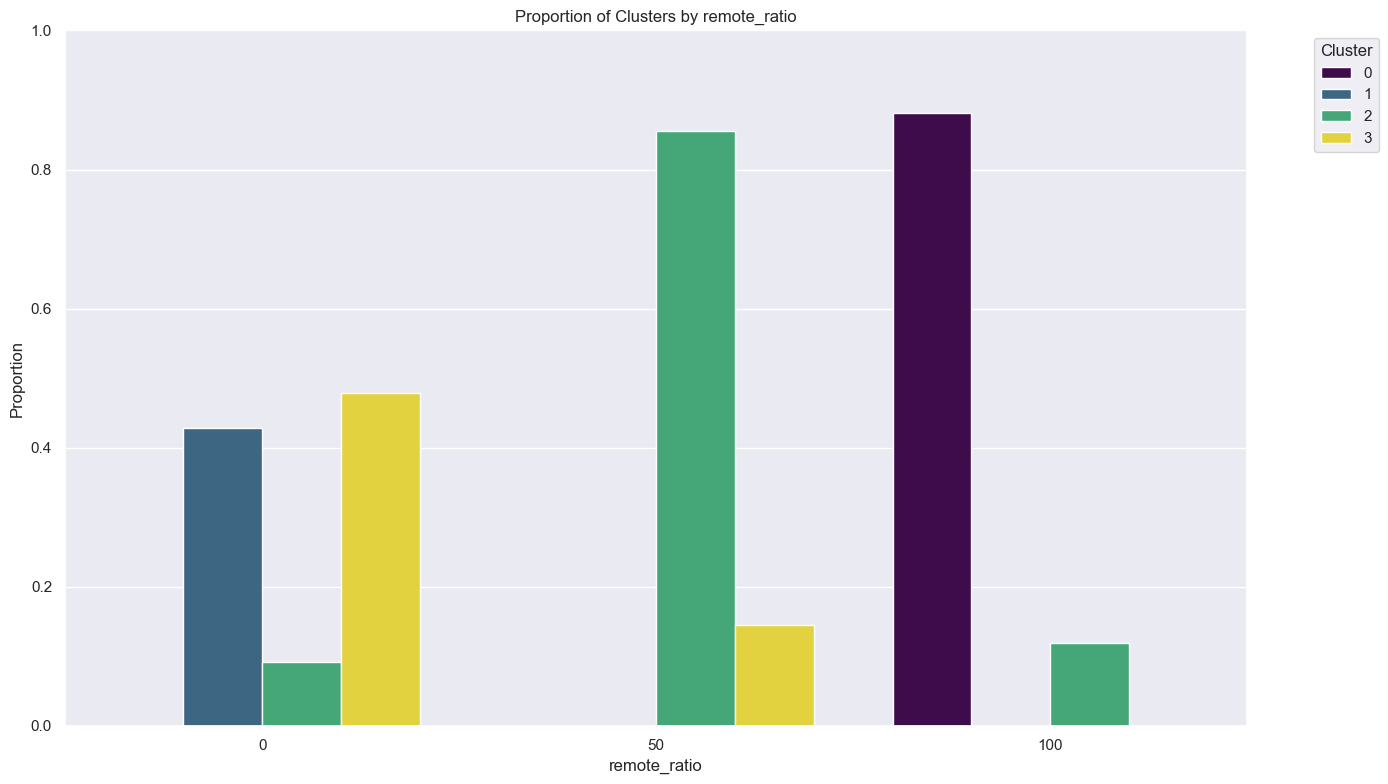

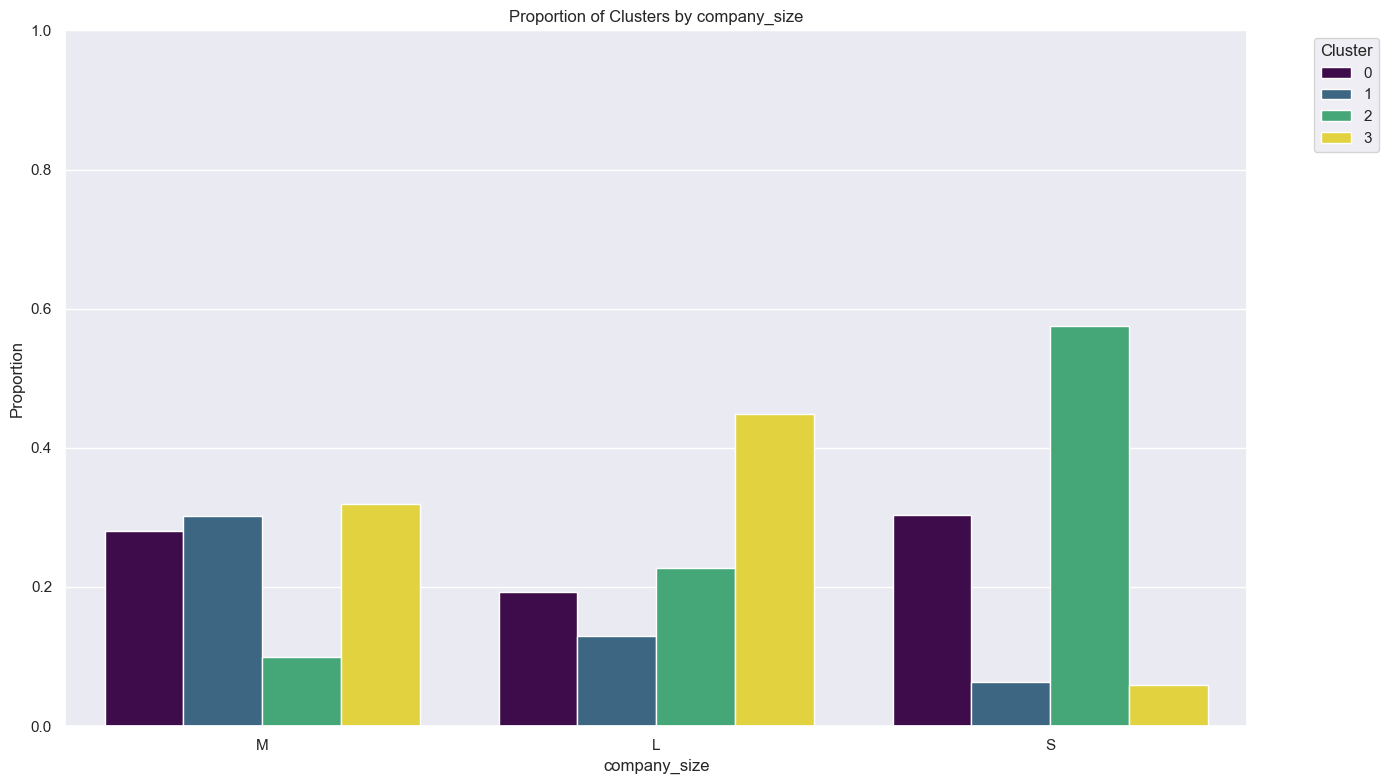

In [78]:
categorical_columns = ["work_year", "experience_level", "employment_type", "remote_ratio", "company_size"]

def plot_combined_bar_charts(df, column):
    unique_values = df[column].unique()
    
    proportions = []
    
    for value in unique_values:
        value_counts = df[df[column] == value]['cluster'].value_counts(normalize=True).sort_index()
        for cluster, proportion in value_counts.items():
            proportions.append([value, cluster, proportion])
    
    prop_df = pd.DataFrame(proportions, columns=[column, 'cluster', 'proportion'])
    
    plt.figure(figsize=(14, 8))
    sns.barplot(x=column, y='proportion', hue='cluster', data=prop_df, palette='viridis')
    plt.title(f'Proportion of Clusters by {column}')
    plt.xlabel(column)
    plt.ylabel('Proportion')
    plt.ylim(0, 1)
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

for column in categorical_columns:
    plot_combined_bar_charts(df, column)

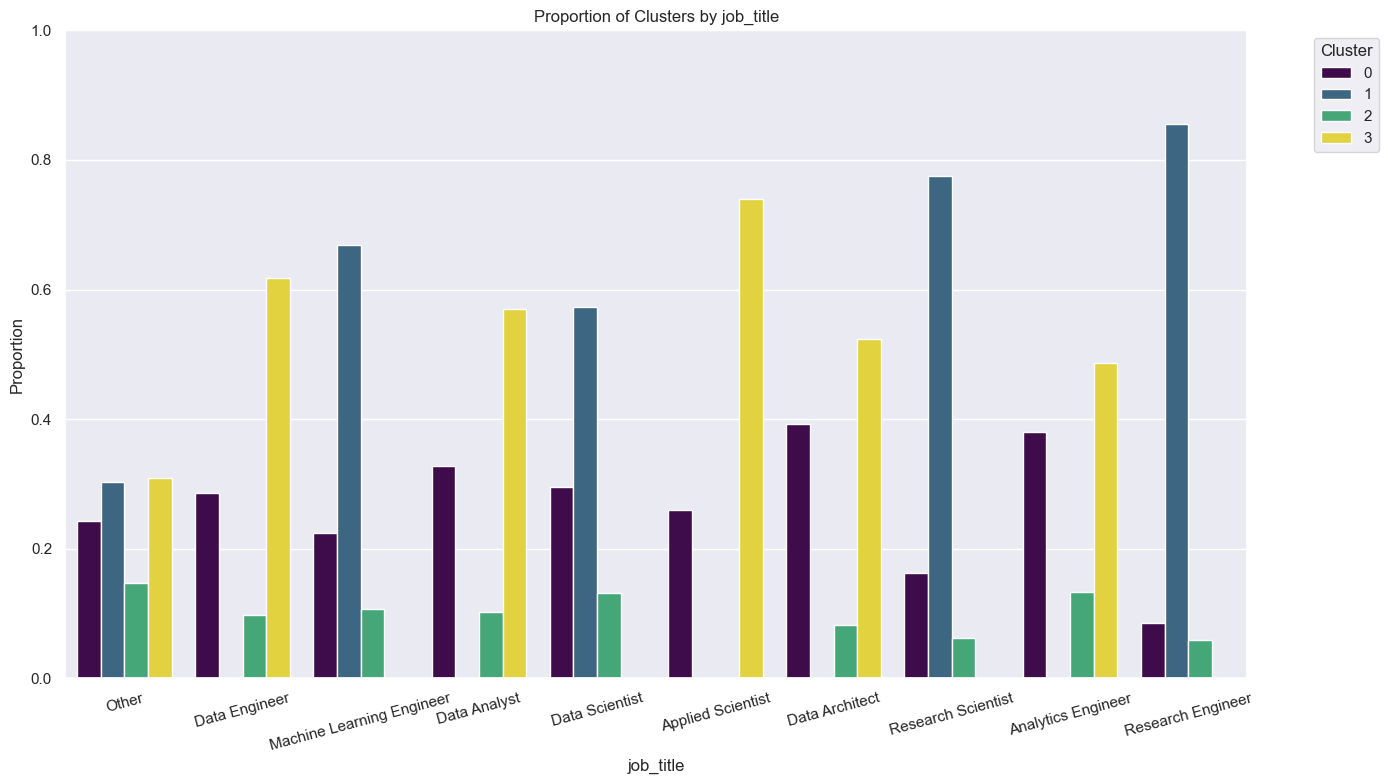

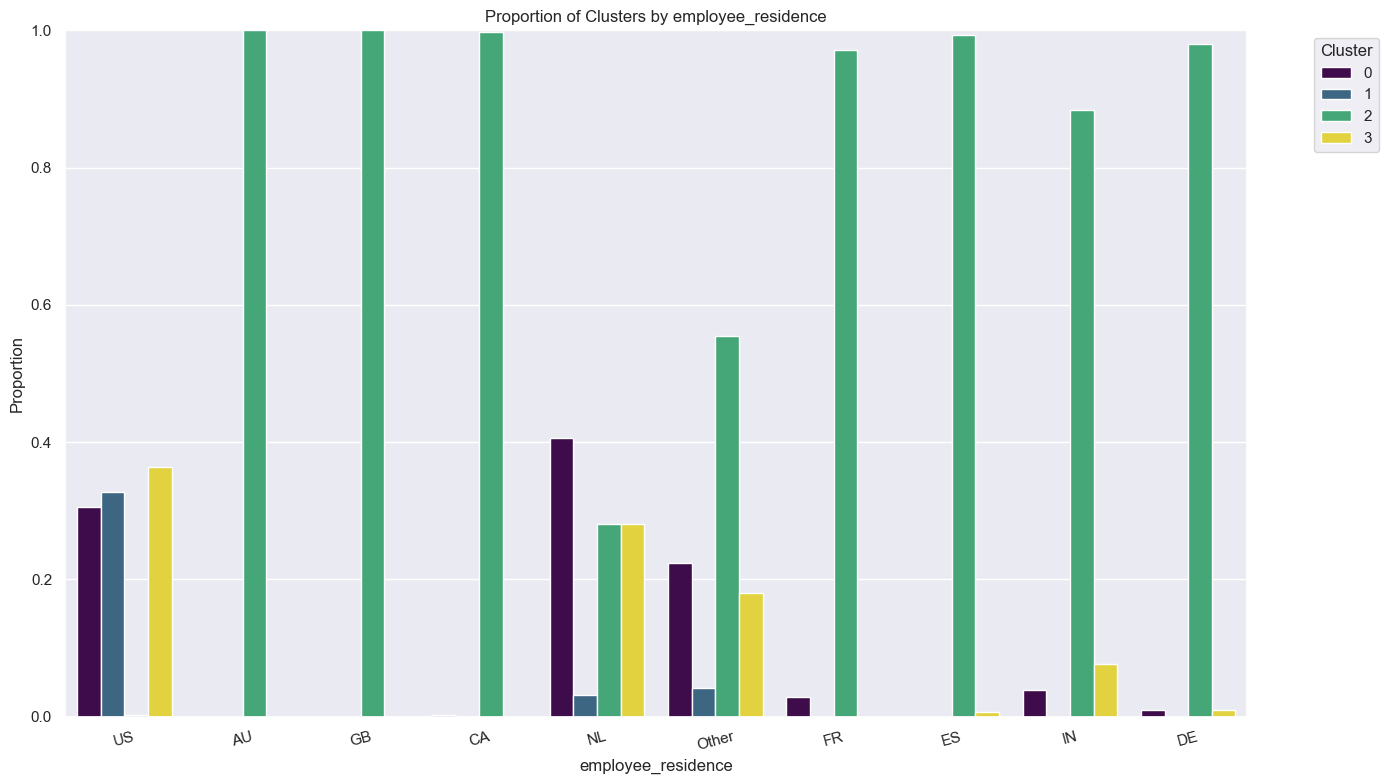

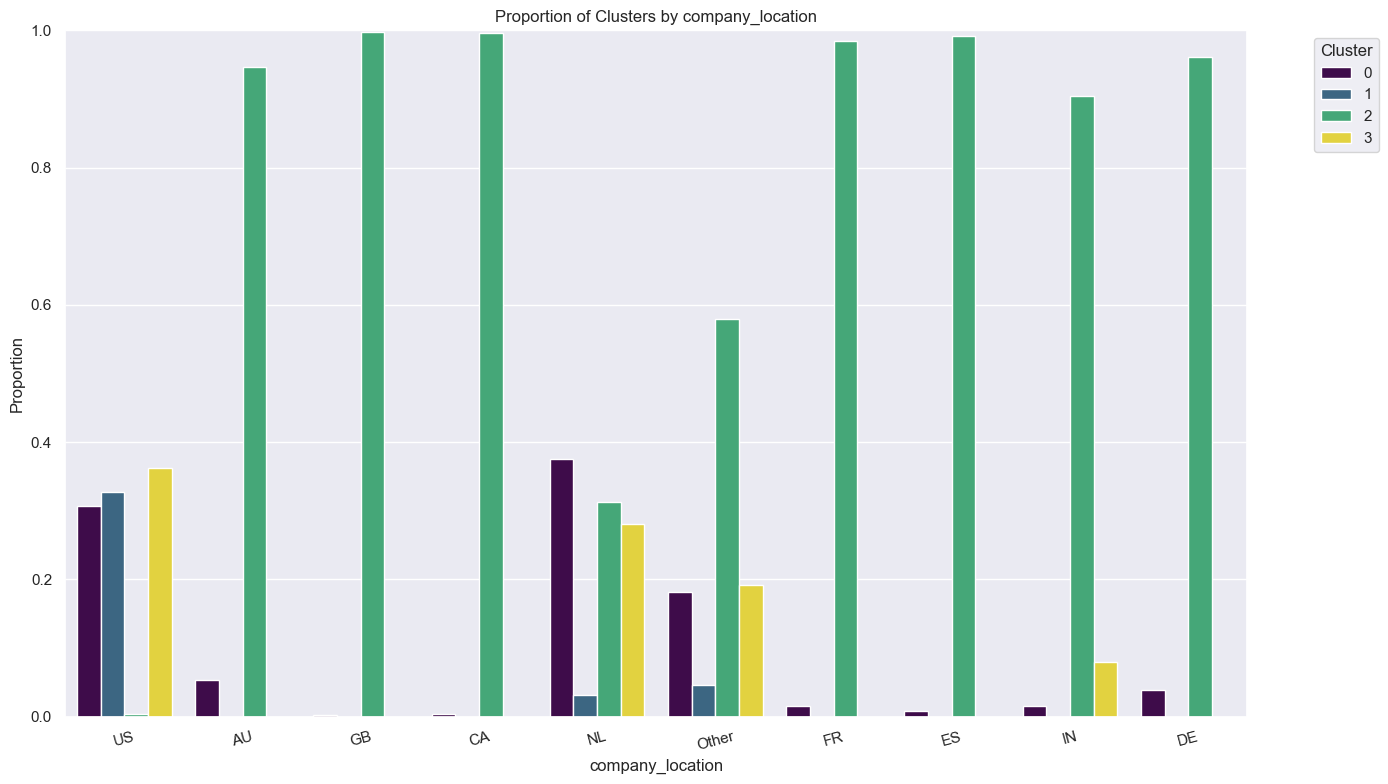

In [85]:
def group_top_n(df, column, top_n=10):
    top_categories = df[column].value_counts().nlargest(top_n).index
    df[column] = df[column].apply(lambda x: x if x in top_categories else 'Other')
    return df

categorical_columns = ["job_title", "employee_residence", "company_location"]

top_n = 10
df_test_top_n = df.copy()  
for column in categorical_columns:
    df_test_top_n = group_top_n(df_test_top_n, column, top_n)

def plot_combined_bar_charts(df, column):
    proportions = []
    unique_values = df[column].unique()
    
    for value in unique_values:
        value_counts = df[df[column] == value]['cluster'].value_counts(normalize=True).sort_index()
        for cluster, proportion in value_counts.items():
            proportions.append([value, cluster, proportion])
    
    prop_df = pd.DataFrame(proportions, columns=[column, 'cluster', 'proportion'])
    
    plt.figure(figsize=(14, 8))
    sns.barplot(x=column, y='proportion', hue='cluster', data=prop_df, palette='viridis')
    plt.title(f'Proportion of Clusters by {column}')
    plt.xlabel(column)
    plt.xticks(rotation=15)
    plt.ylabel('Proportion')
    plt.ylim(0, 1)
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

for column in categorical_columns:
    plot_combined_bar_charts(df_test_top_n, column)